In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr

# ***Import Dataset***

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')

# ***Descriptive Analysis***

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Mencari tahu nilai null
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, dtype, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,dtype,null_values,null_percentage,unique_values,unique_sample
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,0,0.00,3,"[2017, 2018, 2019]"
4,arrival_date_month,object,0,0.00,12,"[September, October, November, December, January]"
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3]"
8,stays_in_weekdays_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4]"
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40]"


In [7]:
# Memisahkan kolom berdasarkan tipe datanya
nums = df.select_dtypes(include=[int, float]).columns.tolist()
cats = df.select_dtypes(include=[object]).columns.tolist()

In [9]:
# Mengganti value yang tidak sesuai
df['meal'] = df['meal'].replace('Undefined', 'No Meal')

Mengganti value *Undefined* pada kolom meal dengan *No Meal* karena diasumsikan customer tidak memesan kamar dengan paket makan.

In [10]:
# Mengganti value yang tidak sesuai
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'TA/TO')

Mengganti value Undefined pada kolom distribution channel menjadi TA/TO karena TA/TO adalah value mayoritas.

# ***Univariate Analysis***

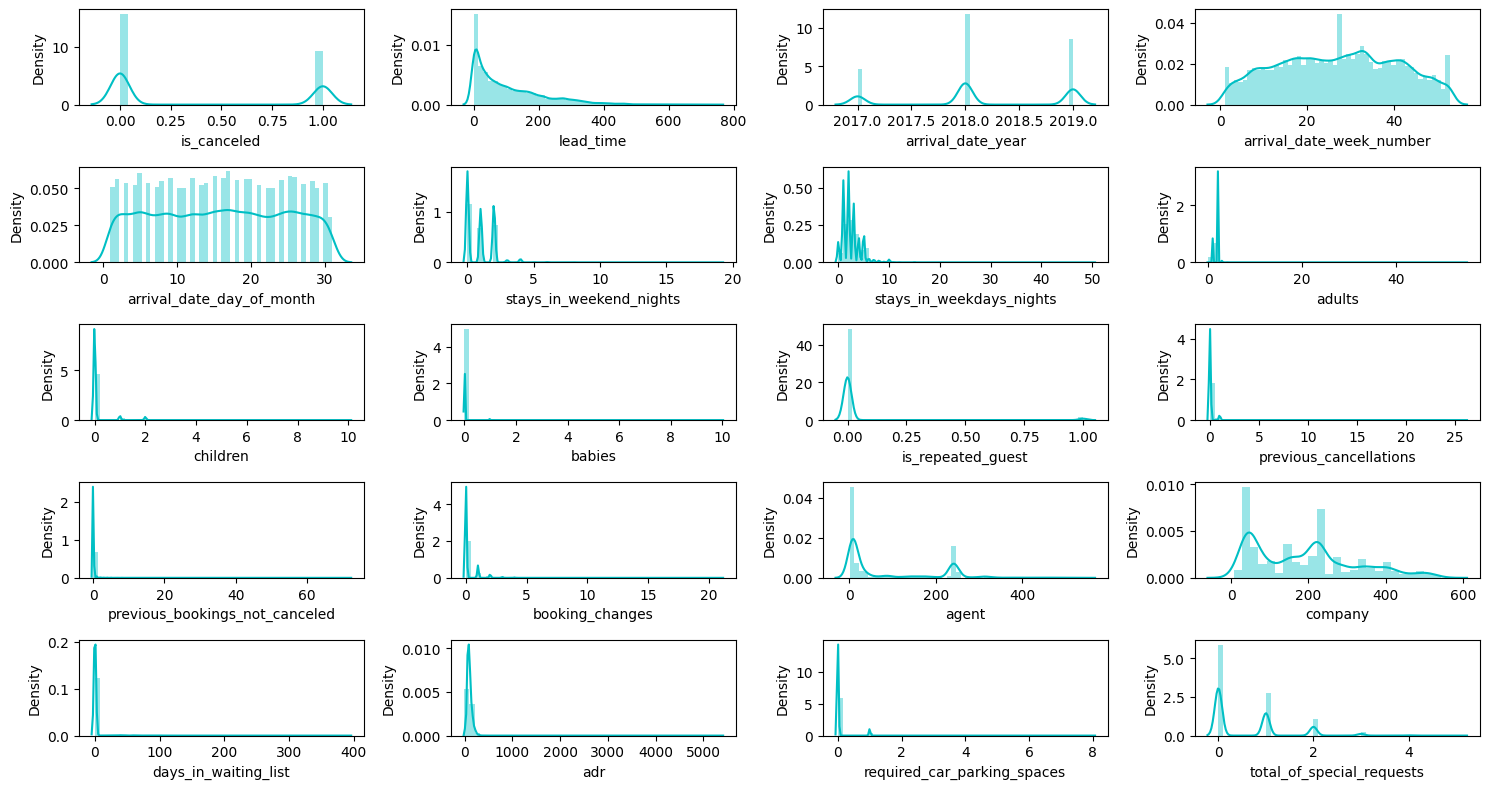

In [11]:
# cek distribusi fitur numerikal
plt.figure(figsize=(15, 8))
for i in range(0, len(nums)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[nums[i]], color='#00bfc4')
    plt.tight_layout()

In [12]:
df['babies'].value_counts()

,count
babies,
0,118473
1,900
2,15
10,1
9,1


In [13]:
df['children'].value_counts()

,count
children,
0.0,110796
1.0,4861
2.0,3652
3.0,76
10.0,1


Sebagian besar fitur dalam dataset memiliki distribusi yang **cenderung miring ke kanan (right-skewed)**, menunjukkan bahwa sebagian besar nilai berada di rentang yang lebih rendah dengan beberapa nilai ekstrem di ujung yang lebih tinggi.

Bisa jadi nilai ekstrem tersebut karena kesalahan penulisan, seperti pada kolom babies, terdapat nilai 9 dan 10. Hal tersebut tidak masuk akal, karena hampir tidak mungkin tamu yang hanya menyewa 1 kamar membawa 9-10 babies. Atau membawa 10 children.

# ***Data Preprocessing***

### *Handle Missing Value*

In [14]:
df_prep = df.copy()

In [15]:
missing_value = df_prep.isnull().sum().reset_index()
missing_value.columns = ['Feature', 'Missing_value']
missing_value

,Feature,Missing_value
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_weekdays_nights,0
9,adults,0


Terdapat empat feature yang memiliki nilai null. Feature tersebut ialah **company, agent, children, city.**

In [16]:
# Handle missing value untuk kolom company
df_prep['company'] = df_prep['company'].fillna(0)

In [17]:
# Handle missing value untuk kolom agent
df_prep['agent'] = df_prep['agent'].fillna(0)

In [18]:
# Handle missing value untuk kolom children
df_prep['children'] = df_prep['children'].fillna(0)

In [19]:
# Handle missing value untuk kolom children
df_prep['city'] = df_prep['city'].fillna('unknown')

In [20]:
missing_value = df_prep.isnull().sum().reset_index()
missing_value.columns = ['Feature', 'Missing_value']
missing_value

,Feature,Missing_value
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_weekdays_nights,0
9,adults,0


### *Mengganti Tipe Data*

In [21]:
# Mengganti tipe data
df_prep['children'] = df_prep['children'].astype('int64')
df_prep['agent'] = df_prep['agent'].astype('int64')
df_prep['company'] = df_prep['company'].astype('int64')

### *Mengganti Data yang Tidak Diperlukan*

In [22]:
df_prep['total_guest'] = df_prep['adults'] + df_prep['children'] + df_prep['babies']

In [23]:
## Menghapus nilai 0 pada kolom total_guest
df_prep = df_prep[df_prep['total_guest'] != 0]

In [24]:
df_prep['stay_duration'] = df_prep['stays_in_weekdays_nights'] + df_prep['stays_in_weekend_nights']

In [25]:
## Menghapus nilai 0 pada kolom stay_duration
df_prep = df_prep[df_prep['stay_duration'] != 0]

In [26]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_weekdays_nights        118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal                 

Key Takeaways:
- Terdapat empat fitur yang memiliki nilai null. Fitur tersebut ialah company, agent, children, city.
- Nilai null pada fitur company diganti dengan 0, karena diasumsikan customer tidak memesan tiket melalui company (merupakan pesanan pribadi).
- Mengganti nilai null pada fitur agent dengan 0, karena diasumsikan customer tidak memesan kamar melalui agent.
- Nilai null pada fitur children diisi dengan 0, karena diasumsikan customer tidak membawa anak.
- Mengganti nilai null pada fitur city dengan unknown karena kami tidak mengetahui asal dari customer.
- Mengganti tipe data pada fitur children, agent, company menjadi int64 yang semula adalah float.
- Menambahkan fitur 'total_guest' dengan menjumlahkan kolom adults, children, baby, dan menghapus data yang berisi nilai 0 pada kolom tersebut.
- Menambahkan fitur 'stay_duration' dengan menjumlahkan kolom stays_in_weekend_nights  dan stays_in_weekdays_nights, serta menghapus data yang berisi nilai 0 pada kolom tersebut.

# ***Monthly Hotel Booking Analysis Based on Hotel***

In [27]:
df_agg = df_prep.copy()

In [28]:
## Menghitung jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
dfg_totalbooking = df_agg.groupby(['hotel', 'arrival_date_month',])['arrival_date_year'].agg(['nunique','count']).reset_index()
dfg_totalbooking.columns = ['hotel_type', 'month', 'ammount_of_year', 'total_bookings']

## Menghitung rata-rata pemesanan per bulan untuk setiap hotel
dfg_totalbooking['avg_bookings'] = round(dfg_totalbooking['total_bookings']/dfg_totalbooking['ammount_of_year'], 2)
dfg_totalbooking

,hotel_type,month,ammount_of_year,total_bookings,avg_bookings
0,City Hotel,April,2,4917,2458.50
1,City Hotel,August,2,7874,3937.00
2,City Hotel,December,2,7554,3777.00
3,City Hotel,February,2,4097,2048.50
4,City Hotel,January,2,4309,2154.50
5,City Hotel,July,2,8184,4092.00
6,City Hotel,June,2,7458,3729.00
7,City Hotel,March,2,3712,1856.00
8,City Hotel,May,2,6411,3205.50
9,City Hotel,November,2,7377,3688.50


In [29]:
## Mengurutkan nama bulan
month =  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Mengonversi kolom month menjadi kategori dengan urutan yang ditentukan
dfg_totalbooking['month'] = dfg_totalbooking['month'].str[:3]
dfg_totalbooking['month'] = pd.Categorical(dfg_totalbooking['month'], categories=month, ordered=True)

# Mengurutkan DataFrame berdasarkan hotel_type dan month, lalu mengatur ulang indeks
dfg_totalbooking = dfg_totalbooking.sort_values(['month', 'hotel_type']).reset_index(drop=True)
dfg_totalbooking

,hotel_type,month,ammount_of_year,total_bookings,avg_bookings
0,City Hotel,Jan,2,4309,2154.50
1,Resort Hotel,Jan,2,2403,1201.50
2,City Hotel,Feb,2,4097,2048.50
3,Resort Hotel,Feb,2,2592,1296.00
4,City Hotel,Mar,2,3712,1856.00
5,Resort Hotel,Mar,2,2159,1079.50
6,City Hotel,Apr,2,4917,2458.50
7,Resort Hotel,Apr,2,3081,1540.50
8,City Hotel,May,2,6411,3205.50
9,Resort Hotel,May,2,3305,1652.50


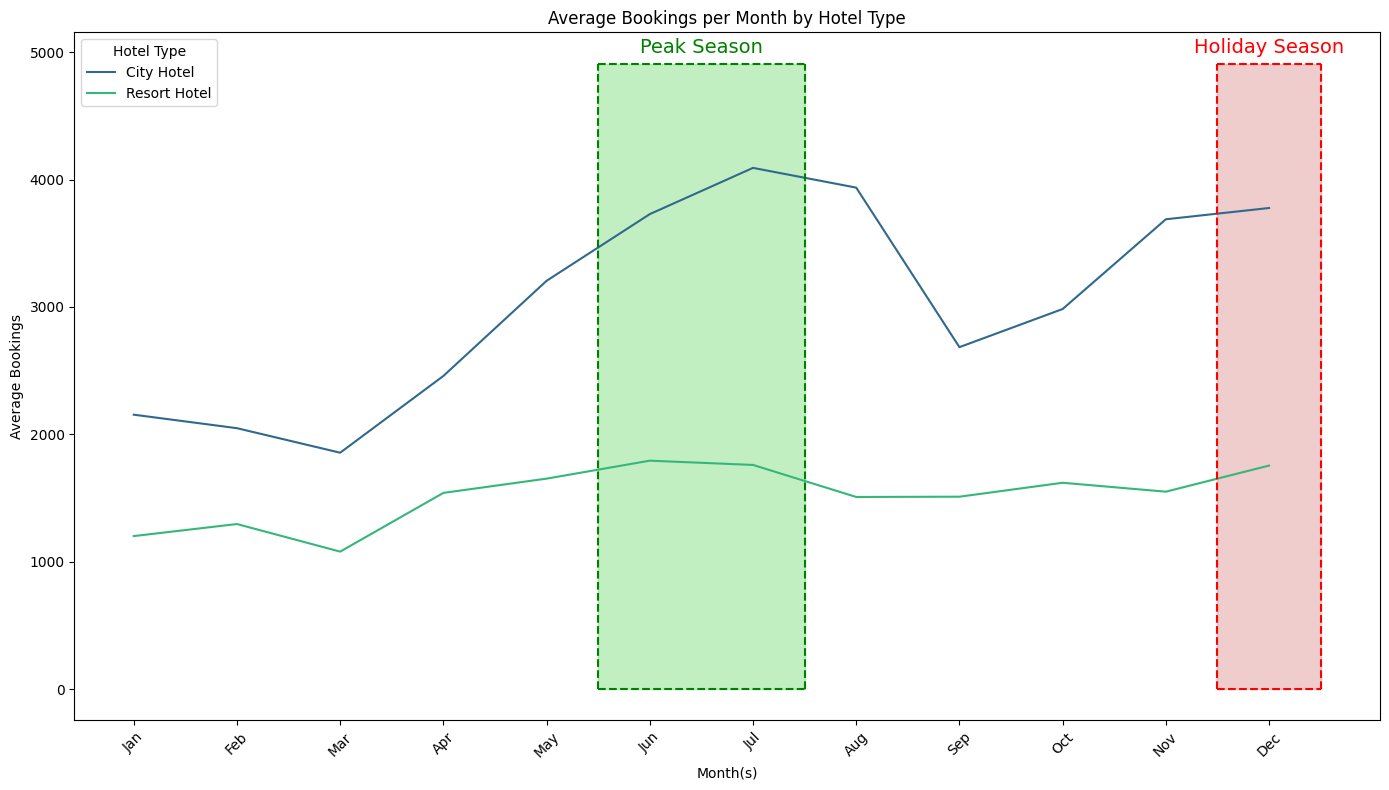

<Figure size 640x480 with 0 Axes>

In [30]:
## Membuat plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
plt.figure(figsize=(14, 8))
sns.lineplot(data=dfg_totalbooking , x='month', y='avg_bookings', hue='hotel_type', palette='viridis')
plt.title('Average Bookings per Month by Hotel Type')
plt.xlabel('Month(s)')
plt.ylabel('Average Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')

# Menambahkan highlight dan anotasi untuk musim puncak dan musim liburan
highlight_ymax = dfg_totalbooking ['avg_bookings'].max() + 0.15

# Menambahkan highlight dan anotasi untuk musim puncak dan musim liburan
highlight_ymax_multiplier = 1.2  # Ganti nilai ini untuk mengatur tinggi

# Peak Season
plt.fill_between(np.arange(4.5, 7.5), 0, highlight_ymax * highlight_ymax_multiplier, color='limegreen', alpha=0.3)
plt.plot([4.5, 4.5], [0, highlight_ymax * highlight_ymax_multiplier], 'g--')
plt.plot([6.5, 6.5], [0, highlight_ymax * highlight_ymax_multiplier], 'g--')
plt.plot([4.5, 6.5], [highlight_ymax * highlight_ymax_multiplier, highlight_ymax * highlight_ymax_multiplier], 'g--')
plt.plot([4.5, 6.5], [0, 0], 'g--')  # Garis horizontal di bagian bawah
plt.text(x=5.5, y=highlight_ymax * 1.22 + 0.05, s='Peak Season', fontsize=14, color='green', ha='center')


plt.fill_between(np.arange(10.5, 12.5), 0, highlight_ymax * highlight_ymax_multiplier, color='indianred', alpha=0.3)
plt.plot([10.5, 10.5], [0, highlight_ymax * highlight_ymax_multiplier], 'r--')
plt.plot([11.5, 11.5], [0, highlight_ymax * highlight_ymax_multiplier], 'r--')
plt.plot([10.5, 11.5], [highlight_ymax * highlight_ymax_multiplier, highlight_ymax * highlight_ymax_multiplier], 'r--')
plt.plot([10.5, 11.5], [0, 0], 'r--')  # Garis horizontal di bagian bawah
plt.text(x=11, y=highlight_ymax * 1.22 + 0.05, s='Holiday Season', fontsize=14, color='red', ha='center')

plt.tight_layout()
plt.show()
sns.despine()

Analisis di atas berfokus untuk melihat *trend* pemesanan untuk kedua jenis hotel dari waktu ke waktu.

Dari plot di atas, kita dapat melihat bahwa **pemesanan tertinggi** untuk kedua jenis hotel ada di bulan **Juni dan Juli**. Jika ditelaah lebih lanjut, pada bulan tersebut bertepatan dengan libur sekolah dan libur hari raya.

Pada bulan **Agustus dan September** mengalami **penurunan** pemesanan secara signifikan. Sedangkan untuk bulan lain, tidak bertepatan dengan libur panjang atau long weekend, Sehingga pemesanan hotel tidak seramai peak season.

Untuk bulan **Desember**, pemesanan hotel kembali **meningkat** karena bertepatan dengan libur sekolah dan libur Nataru.

# ***Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates***

In [31]:
# Membuat kategori berdasarkan stay_duration
def categorize_stay_duration(nights):
    if nights <= 2:
        return 'Short Stay'
    elif nights <= 5:
        return 'Medium Stay'
    elif nights <= 10:
        return 'Long Stay'
    else:
        return 'Extended Stay'

# Menerapkan fungsi ke kolom stay_duration
df_agg['stay_duration_category'] = df_agg['stay_duration'].apply(categorize_stay_duration)

# Melihat distribusi dari kategori baru
df_agg['stay_duration_category'].value_counts()

,count
stay_duration_category,
Medium Stay,52208
Short Stay,48637
Long Stay,15624
Extended Stay,2096


In [32]:
# Membuat tabel aggregat yang menunjukkan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel
df_canceled = df_agg.groupby(['hotel', 'stay_duration_category', 'is_canceled']).size().reset_index(name='count')

# Membuat pivot table untuk melihat jumlah pemesanan yang dibatalkan dan tidak dibatalkan
df_canceled = df_canceled.pivot_table(index=['hotel', 'stay_duration_category'], columns='is_canceled', values='count', fill_value=0).reset_index()

# Mengganti nama kolom untuk memudahkan interpretasi
df_canceled.columns = ['hotel', 'stay_duration_category', 'not_canceled', 'canceled']

# Menghitung proporsi dari pemesanan yang dibatalkan
df_canceled['canceled_proportion'] = df_canceled['canceled'] / (df_canceled['canceled'] + df_canceled['not_canceled'])

# Mengganti tipe data
df_canceled['canceled'] = df_canceled['canceled'].astype(int)
df_canceled['not_canceled'] = df_canceled['not_canceled'].astype(int)

# Menampilkan tabel agregat
df_canceled

,hotel,stay_duration_category,not_canceled,canceled,canceled_proportion
0,City Hotel,Extended Stay,142,290,0.671296
1,City Hotel,Long Stay,2760,2131,0.435698
2,City Hotel,Medium Stay,22793,16110,0.414107
3,City Hotel,Short Stay,20138,14535,0.419202
4,Resort Hotel,Extended Stay,1186,478,0.287260
5,Resort Hotel,Long Stay,7255,3478,0.324047
6,Resort Hotel,Medium Stay,9048,4257,0.319955
7,Resort Hotel,Short Stay,11067,2897,0.207462


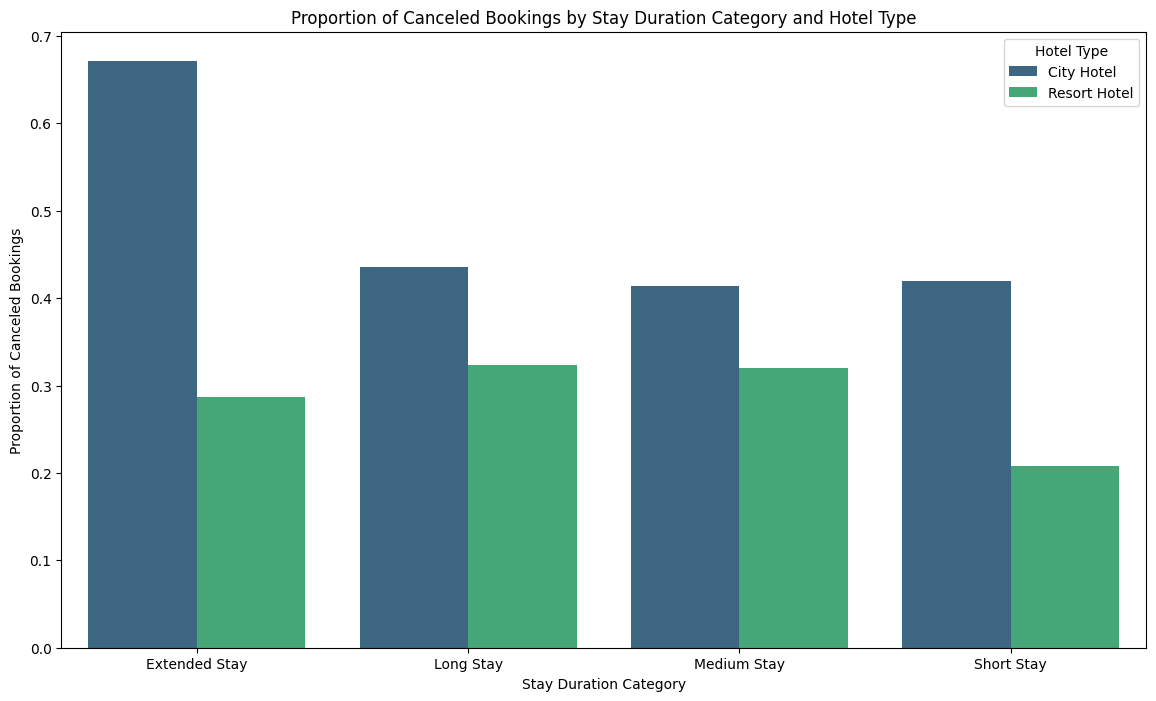

In [33]:
## Membuat plot
plt.figure(figsize=(14, 8))
sns.barplot(data=df_canceled, x='stay_duration_category', y='canceled_proportion', hue='hotel', palette='viridis')
plt.title('Proportion of Canceled Bookings by Stay Duration Category and Hotel Type')
plt.xlabel('Stay Duration Category')
plt.ylabel('Proportion of Canceled Bookings')
plt.legend(title='Hotel Type')

Analisis di atas berfokus untuk melihat *trend* antara durasi menginap dengan tingkat pembatalan.

Dari plot di atas, dapat dilihat bahwa **semakin lama durasi menginap, semakin tinggi kemungkinan tingkat pembatalannya.**

Untuk jenis hotel *city hotel*, tingkat kemungkinan pembatalannya jauh lebih tinggi dibanding *resort hotel*.

# ***Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate***

In [34]:
# Membuat kategori berdasarkan lead_time
def categorize_lead_time(month):
    if month <= 30:
        return '1 month'
    elif month <= 120:
        return '2-4 month'
    elif month <= 210:
        return '5-7 month'
    elif month <= 300:
        return '8-10 month'
    elif month <= 360:
        return '11-12 month'
    else:
        return '> 12 month'

# Menerapkan fungsi ke kolom stay_duration
df_agg['lead_time_category'] = df_agg['lead_time'].apply(categorize_lead_time)

# Melihat distribusi dari kategori baru
df_agg['lead_time_category'].value_counts()

,count
lead_time_category,
2-4 month,39851
1 month,38094
5-7 month,21619
8-10 month,11122
11-12 month,4467
> 12 month,3412


In [36]:
# Mengelompokkan data berdasarkan hotel, stay_duration_category, dan is_canceled
canceled = df_agg.groupby(['hotel', 'lead_time_category', 'is_canceled']).size().reset_index(name='count')

pvt = canceled.pivot_table(index=['hotel', 'lead_time_category'], columns='is_canceled', values='count', fill_value=0).reset_index()

# Mengganti nama kolom untuk memudahkan interpretasi
pvt.columns = ['hotel', 'lead_time_category', 'not_canceled', 'canceled']

# Menghitung proporsi dari pemesanan yang dibatalkan
pvt['canceled_proportion'] = pvt['canceled'] / (pvt['canceled'] + pvt['not_canceled'])

# Menampilkan tabel agregat
pvt

,hotel,lead_time_category,not_canceled,canceled,canceled_proportion
0,City Hotel,1 month,17848.0,5174.0,0.224742
1,City Hotel,11-12 month,731.0,2608.0,0.781072
2,City Hotel,2-4 month,16406.0,11783.0,0.418000
3,City Hotel,5-7 month,7298.0,7051.0,0.491393
4,City Hotel,8-10 month,2760.0,4376.0,0.613229
5,City Hotel,> 12 month,790.0,2074.0,0.724162
6,Resort Hotel,1 month,13096.0,1976.0,0.131104
7,Resort Hotel,11-12 month,615.0,513.0,0.454787
8,Resort Hotel,2-4 month,7663.0,3999.0,0.342909
9,Resort Hotel,5-7 month,4585.0,2685.0,0.369326


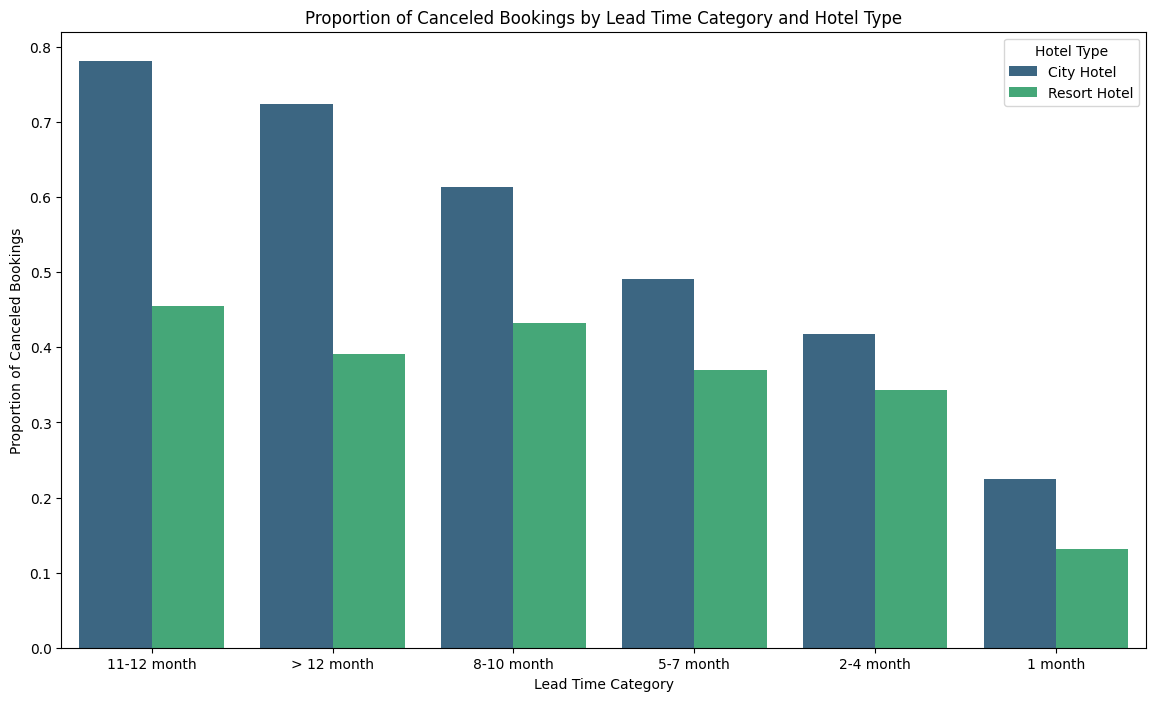

In [40]:
## Menambahkan kolom untuk menggabungkan kategori lead_time dan hotel untuk pengurutan
pvt['sort_col'] = pvt['lead_time_category'] + pvt['hotel']

# Mengurutkan berdasarkan canceled_proportion dalam urutan menurun
pivot_sorted = pvt.sort_values(by='canceled_proportion', ascending=False)

## Membuat bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=pivot_sorted, x='lead_time_category', y='canceled_proportion', hue='hotel', palette='viridis')
plt.title('Proportion of Canceled Bookings by Lead Time Category and Hotel Type')
plt.xlabel('Lead Time Category')
plt.ylabel('Proportion of Canceled Bookings')
plt.legend(title='Hotel Type')

plt.show()

Analisis di atas berfokus untuk melihat *trend* antara jarak waktu pemesanan dengan tingkat pembatalan pemesanan hotel.

Dari analisis di atas, dapat dilihat bahwa semakin lama jarak waktu pemesanan dengan tanggal check in, semakin besar kemungkinan untuk customer membatalkan pesanannya.